<a href="https://colab.research.google.com/github/kyunghoonkook/ai/blob/main/colab_test1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns

diamonds = sns.load_dataset('diamonds')

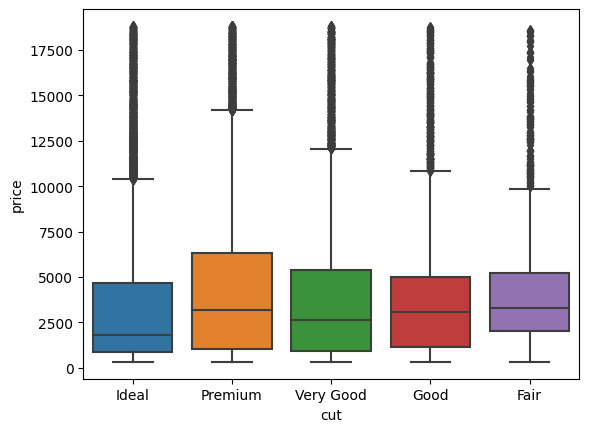

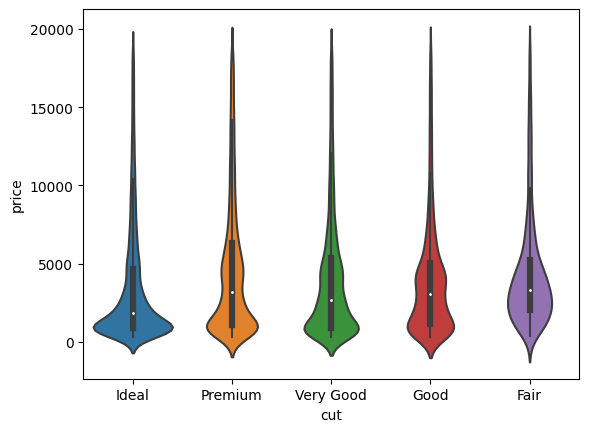

<ipython-input-16-3674d563c4b9>:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = diamonds.corr()


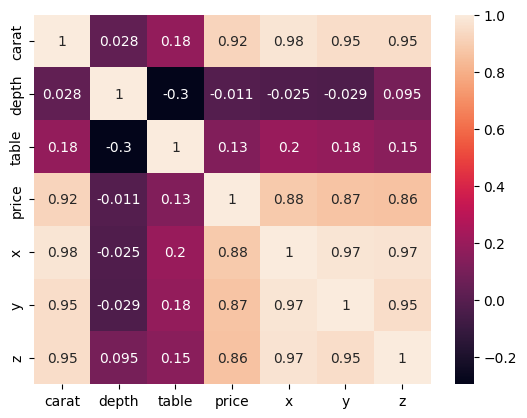

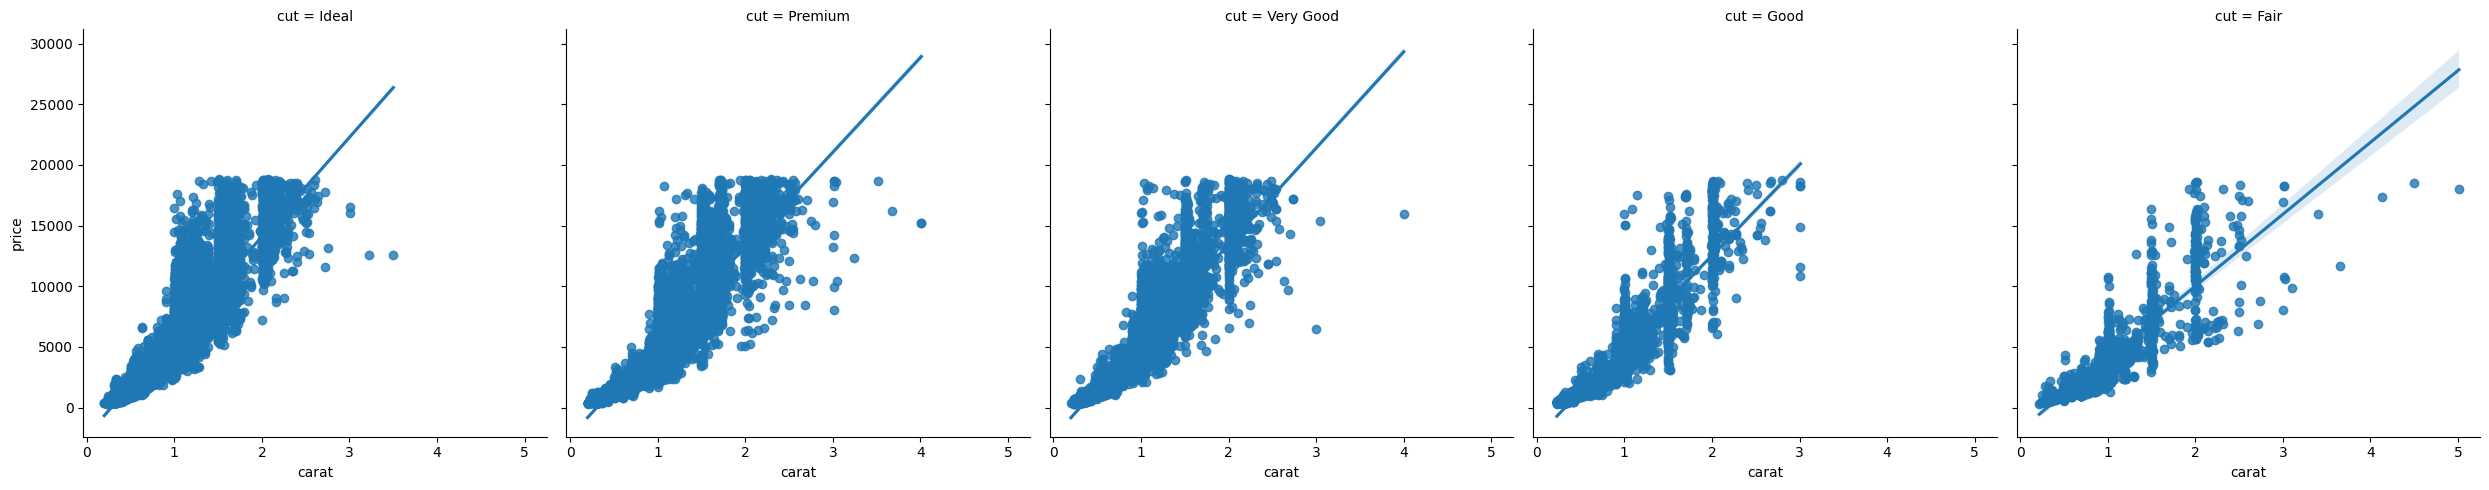

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x="cut", y="price", data=diamonds)
plt.show()

sns.violinplot(x="cut", y="price", data=diamonds)
plt.show()


corr = diamonds.corr()

sns.heatmap(data=corr, annot=True)
plt.show()


sns.lmplot(x="carat", y="price", col="cut", data=diamonds)
plt.show()

In [ ]:
import pandas as pd

diamonds['color'] = pd.factorize(diamonds['color'])[0]
diamonds['clarity'] = pd.factorize(diamonds['clarity'])[0]

x_total = diamonds.drop('cut', axis=1).values
y_total = diamonds['cut'].values


In [ ]:
from sklearn.model_selection import train_test_split




from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

x_train, x_test, y_train, y_test = train_test_split(x_total, y_total, test_size=0.3, random_state=42)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

models = [
    KNeighborsClassifier(),
    GaussianNB(),
    DecisionTreeClassifier()
]

for model in models:
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    accuracy = accuracy_score(y_test, predictions)
    print(f"{model.__class__.__name__} accuracy: {accuracy}")


KNeighborsClassifier accuracy: 0.6656161166728464
GaussianNB accuracy: 0.5733531083920406
DecisionTreeClassifier accuracy: 0.7104807811148189


In [ ]:
from sklearn.model_selection import GridSearchCV

knn_params = {
    'n_neighbors': list(range(3, 15))
}
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, scoring='accuracy', cv=5, n_jobs=-1)
knn_grid.fit(x_train, y_train)
print("Best KNN parameters:", knn_grid.best_params_)
print("Best KNN accuracy:", knn_grid.best_score_)

dt_params = {
    'max_depth': list(range(3, 15)),
    'min_samples_leaf': list(range(1, 5))
}
dt_grid = GridSearchCV(DecisionTreeClassifier(), dt_params, scoring='accuracy', cv=5, n_jobs=-1)
dt_grid.fit(x_train, y_train)
print("Best Decision Tree parameters:", dt_grid.best_params_)
print("Best Decision Tree accuracy:", dt_grid.best_score_)



Best KNN parameters: {'n_neighbors': 13}
Best KNN accuracy: 0.6800677848258958
Best Decision Tree parameters: {'max_depth': 12, 'min_samples_leaf': 4}
Best Decision Tree accuracy: 0.7470734387520791
